**Course website**: http://www.leouieda.com/geofisica1

**Note**: This notebook is part of the course "Geofísica 1" of Geology program of the 
[Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). 
All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Prática 1 - O IGRF e a anomalia magnética de campo total

Objetivos:

* Visualizar o campo magnético de referência [IGRF](http://en.wikipedia.org/wiki/International_Geomagnetic_Reference_Field).
* Verificar os efeitos da variação secular do campo geomagnético no último século.
* Visualizar o campo magnético induzido em um corpo (cubo) para diferentes inclinações.
* Entender a relação entre campo magnético induzido, o campo magnético da Terra (IGRF) e a anomalia magnética de campo total.
* Entender o papel da  inclinação e  declinação magnética na forma da anomalia.

## Preparação

Esse documento que você está usando é um [IPython notebook](http://ipython.org/notebook.html). É um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (que pode ser números, texto, figuras, videos, etc). Esta prática usará a biblioteca [Fatiando a Terra](http://fatiando.org) de modelagem geofísica e também o módulo [numpy](http://www.numpy.org/).

O notebook é divido em células (como esta). Para editar o conteúdo de uma célula, clique nela (clique nesta para editar esse texto). Para executar uma célula, aperte `Shift + Enter`. Execute as duas células abaixo.

In [1]:
%matplotlib inline
from __future__ import division, print_function
from IPython.html import widgets
from fatiando import gridder, mesher, utils
from fatiando.gravmag import prism, sphere
from fatiando.vis import mpl
import fatiando
import numpy as np
mpl.rc('font', size=12)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
print('Versão do Fatiando a Terra: {}'.format(fatiando.__version__))

Versão do Fatiando a Terra: 0.3-203-g8053f42


## Tarefa 2: O campo magnético induzido em um cubo

Vamos ver como varia o campo magnético induzido em cubo para diferentes inclinações do campo magnético indutor.

Rode as células abaixo para criar um cubo e produzir uma figura interativa.

In [7]:
areacubo = [-400, 400, 400, 1200]
cubo = mesher.Prism(areacubo[0], areacubo[1], -50000, 50000, areacubo[2], areacubo[3])
area = (-1200, 1200, -400, 2000)
x, y, z = gridder.regular(area, (13, 13), z=0)

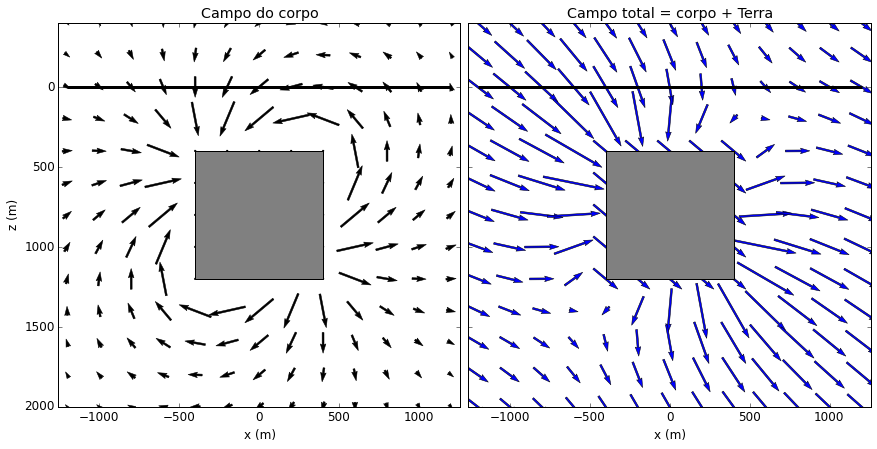

In [8]:
def total_cubo(inc, suceptibilidade):
    cubo.addprop('magnetization', utils.ang2vec(suceptibilidade, inc, 0))
    def mask(area, v):
        x1, x2, y1, y2 = area
        v[(x >= x1) & (x <= x2) & (y >= y1) & (y <= y2)] = 0
        return v
    terra = utils.ang2vec(10000, inc, 0)
    bx = mask(areacubo, prism.bx(x, z, y, [cubo]))
    bz = mask(areacubo, prism.bz(x, z, y, [cubo]))
    tx =  bx + terra[0]
    tz =  bz + terra[2]
    fig, axes = mpl.subplots(1, 2, sharey='all', figsize=(12, 6))
    ax1, ax2 = axes
    mpl.sca(ax1)
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    mpl.square(areacubo, fill='grey')
    mpl.quiver(x, y, bx, bz, linewidth=0.5, 
               scale=50, pivot='middle', angles='xy', scale_units='xy')
    mpl.hlines(0, area[0], area[1], linewidth=3)
    mpl.set_area(area)
    mpl.gca().invert_yaxis()
    mpl.xlabel('x (m)')
    mpl.ylabel('z (m)')
    mpl.title('Campo do corpo')    
    mpl.sca(ax2)
    mpl.square(areacubo, fill='grey')
    mpl.quiver(x, y, tx, tz, linewidth=0.5, color='b',
               scale=50, pivot='middle', angles='xy', scale_units='xy')
    mpl.hlines(0, area[0], area[1], linewidth=3)
    mpl.xlabel('x (m)')
    mpl.title('Campo total = corpo + Terra')    
    mpl.tight_layout(pad=0)
widgets.interactive(total_cubo, inc=widgets.IntSliderWidget(min=-90, max=90, step=5, value=45),
                    suceptibilidade=widgets.IntSliderWidget(min=0, max=50, step=10, value=0))

### Sobre as figuras

* A figura da **esquerda** mostra o cubo (em cinza). A linha preta é a superfície (z = 0). 
* Na presença de um campo externo indutor, o corpo se magnetiza e gera um campo magnético. Esse campo será mostrado nessa figura em setas pretas.
* A figura da **direita** mostra o campo total presente, ou seja, o campo externo indutor (como o campo da Terra, por exemplo) mais o campo do cubo.
* O botão `inc` controla a inclinação do campo magnético indutor (o da Terra). 
* O botão `suceptibilidade` controla a susceptibilidade magnética do corpo (o quanto ele se magnetiza na presença de um campo indutor).
* A **anomalia magnética de campo total** é a diferença entre as **amplitudes** do campo total (azul na figura da direita) e o campo da Terra.

### Tarefas e perguntas

1. Aumente a susceptibilidade do cubo e mantenha a inclinação fixa em 45 graus.
    * O que acontece com o campo magnético do cubo? A direção do campo magnético do cubo muda?
    * O que acontece com o campo total? 
    * Como varia a amplitude do campo total medida na superfície em relação ao campo da Terra?
    * Faça um esboço de como seria a anomalia de campo total medida na superfície.
2. Mantenha a susceptibilidade constante e varie a inclinação do campo da Terra. Coloque a inclinação em -90 graus (pólo Sul).
    * O que acontece com o campo total que seria observado na superfície?
    * Faça um esboço de como seria a anomalia de campo total medida na superfície.
3. Coloque a inclinação em 90 graus (pólo Norte).
    * Como essa situação difere do pólo Sul para o campo do corpo e o campo total?
    * Faça um esboço de como seria a anomalia de campo total medida na superfície.
    * A anomalia de campo total é diferente da que seria observada no pólo Sul?
4. Coloque a inclinação em 0 graus (equador).
    * Faça um esboço de como seria a anomalia de campo total medida na superfície.

## Tarefa 3: A anomalia magnética de campo total medida na superfície

Agora vamos ver como a anomalia de campo total fica em um mapa. Vamos simular a anomalia de campo total causada por um prisma (um paralelepípedo). A anomalia será calculada em uma area na superfície.

Rode as células abaixo para criar uma figura interativa.

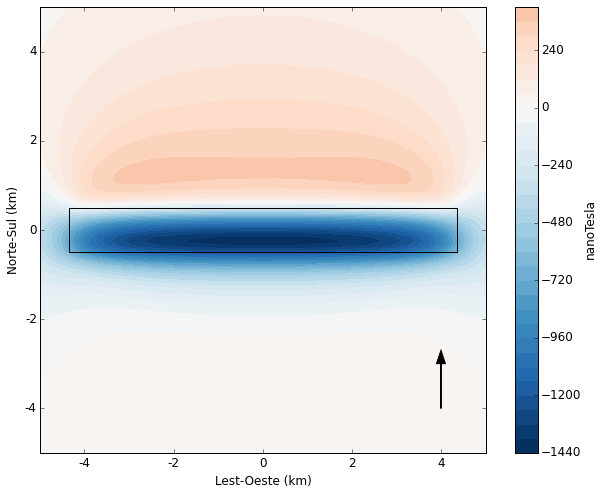

In [12]:
x, y, z = gridder.regular((-5000, 5000, -5000, 5000), (100, 100), z=0)

def mapa_anomalia_cubo(dx, dy, inc, dec):
    cubo = mesher.Prism(-dy/2, dy/2, -dx/2, dx/2, 400, 4000,
                        props=dict(magnetization=utils.ang2vec(5, inc, dec)))
    tf = prism.tf(x, y, z, [cubo], inc, dec)
    terra = utils.ang2vec(1000, 0, dec)
    mpl.figure(figsize=(9, 7))
    mpl.axis('scaled')
    mpl.square(cubo.get_bounds()[:4][::-1])
    ranges = np.abs([tf.min(), tf.max()]).max()
    mpl.contourf(y, x, tf, (100, 100), levels=30, cmap="RdBu_r", vmin=-ranges, vmax=ranges)
    mpl.colorbar().set_label('nanoTesla')
    mpl.arrow(4e3, -4e3, terra[1], terra[0], width=10, color='k')
    mpl.m2km()
    mpl.xlabel('Lest-Oeste (km)')
    mpl.ylabel('Norte-Sul (km)')
    mpl.tight_layout()
    
widgets.interactive(mapa_anomalia_cubo, 
                    dx=widgets.IntSliderWidget(min=100, max=10000, step=100, value=1000),
                    dy=widgets.IntSliderWidget(min=100, max=10000, step=100, value=1000),
                    inc=widgets.IntSliderWidget(min=-90, max=90, step=5, value=45),
                    dec=widgets.IntSliderWidget(min=-90, max=90, step=5, value=0))

### Sobre a figura

* O retângulo preto mostra as dimensões horizontais do prisma.
* A seta mostra a declinação do campo da Terra (o indutor).
* As cores são a anomalia de campo total causada pelo prisma.
* Os botões `dx` e `dy` controlam as dimensões do prisma.
* Os botões `inc` e `dec` controlam a inclinação e declinação do campo da Terra.

### Tarefas e perguntas

1. Mantenha as dimensões do prisma e a declinação contantes (faça um prisma quadrado e declinação 0). Varie somente a inclinação.
    * Como fica a anomalia de campo total nos pólos? Ela é diferente no pólo Norte e no Sul?
    * Como fica a anomalia no equador? 
    * Esses mapas são condizentes com o que você esperava da tarefa 2?
2. Coloque a inclinação em 45 graus e varie a declinação.
    * O que acontece com a anomalia quando você varia a declinação?
    * Coloque a inclinação em 90 graus. O que acontece quando você varia a declinação? Explique.
3. Faça um corpo alongado na direção norte-sul. Coloque a declinação em 0.
    * O que acontece quando você varia a inclinação? 
    * Como fica a anomalia quando a inclinação é 0?
    * Como fica quando a inclinação é 90?
4. Faça um corpo alongado na direção leste-oeste. Coloque a declinação em 0.
    * Como fica a anomalia quando a inclinação é 0?
    * Como fica quando a inclinação é 90?
    * Qual é corpo seria mais fácilmente identificado através da anomalia se a inclinação for baixa, o norte-sul ou o leste-oeste?    